In [1]:
!pip install lightgbm
!pip install xgboost

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

import lightgbm as lgb
import xgboost as xgb

# Exploratory Data Analysis (EDA):

In [4]:
# Load the Titanic dataset
train_df = pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('Titanic_test.csv')

In [5]:
# Combine train and test datasets for easier preprocessing
df = pd.concat([train_df, test_df], ignore_index=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


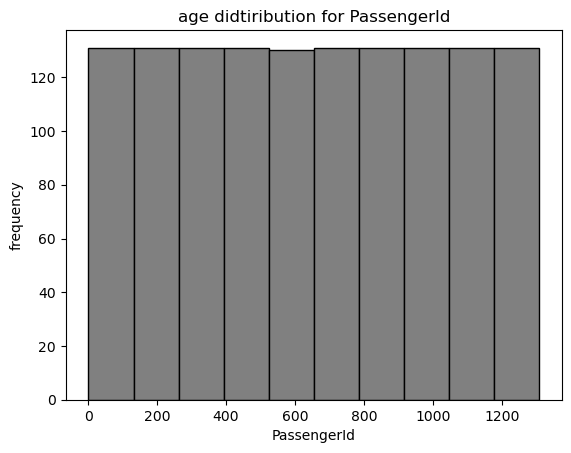

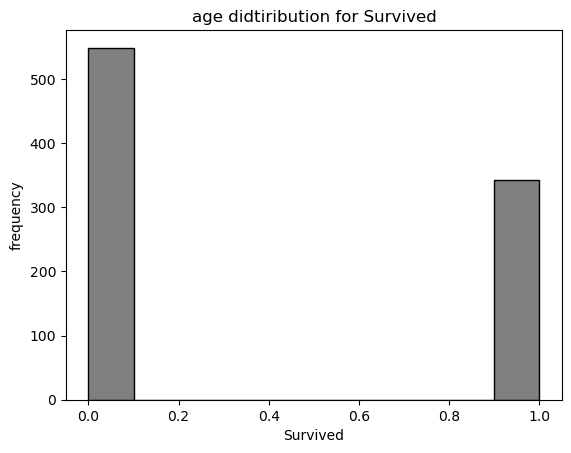

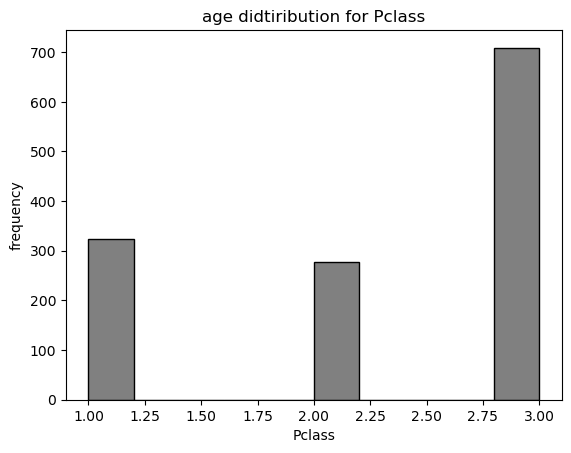

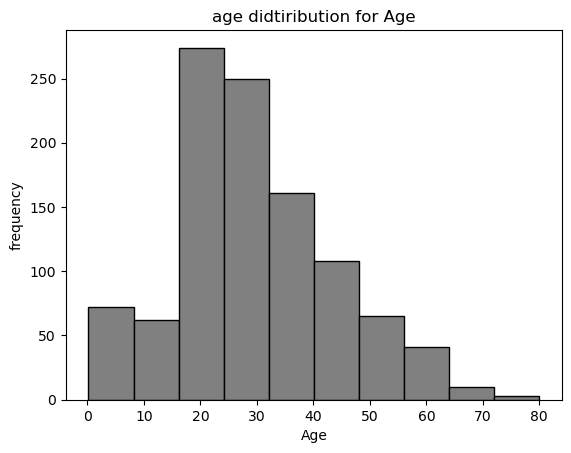

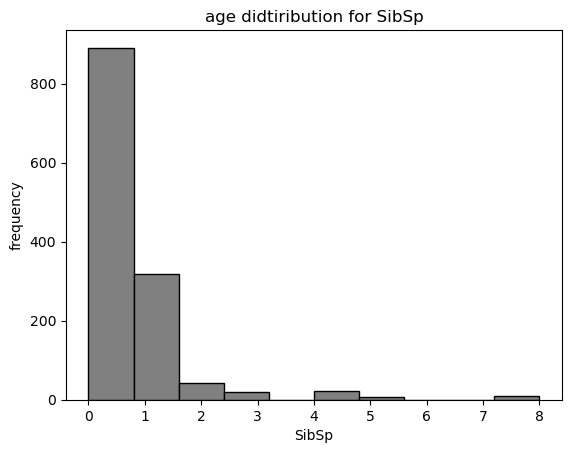

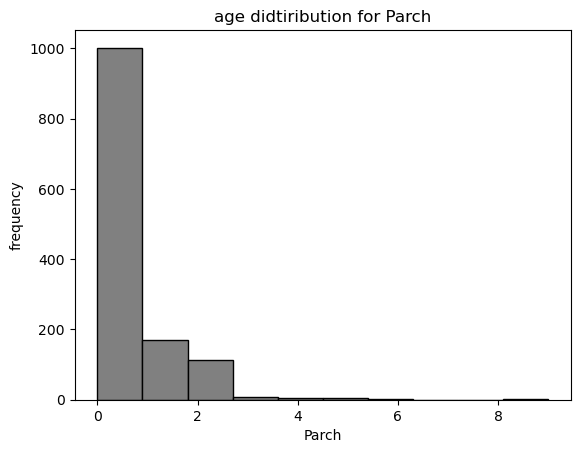

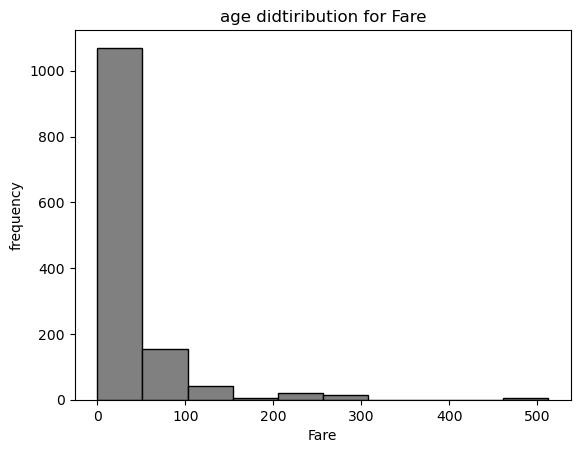

In [7]:
# creating histograms for numerical columns
# selecting only numerical columns
for column in df.select_dtypes(include='number').columns:
    #creating histogram
    plt.hist(df[column],edgecolor='black',color='grey')
    plt.title(f'age didtiribution for {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('frequency')
    plt.show()

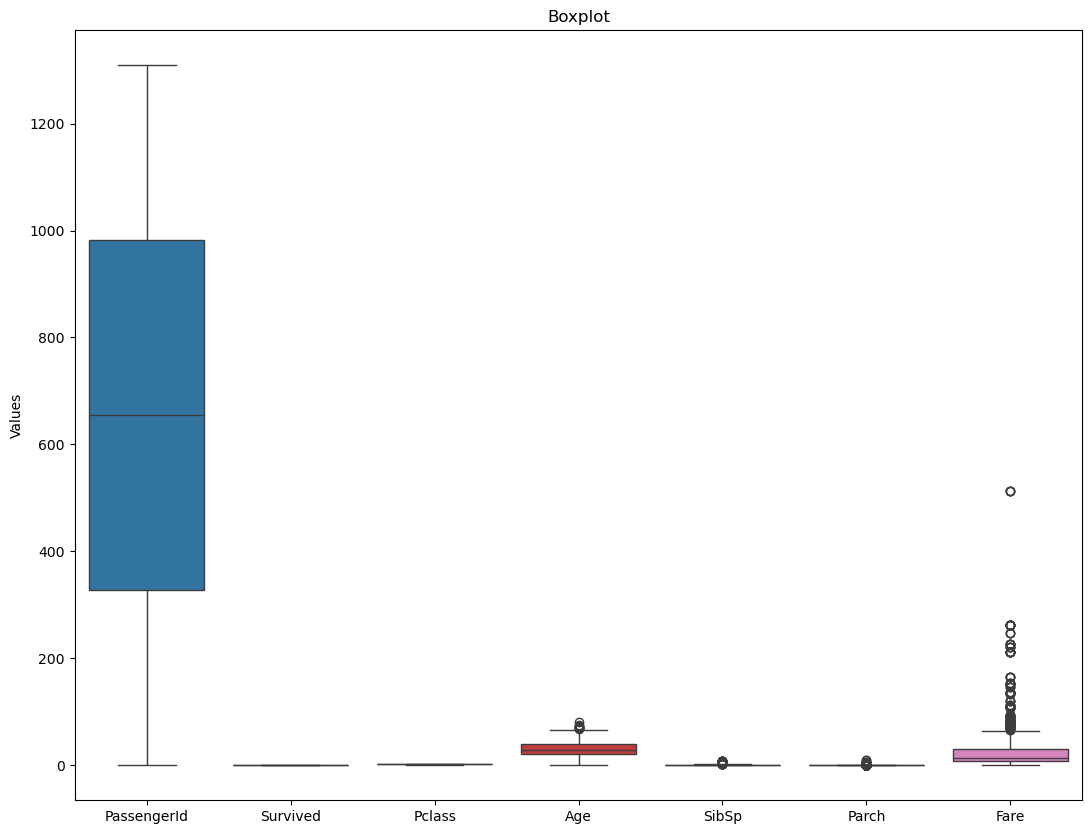

In [8]:
# creating boxplot
plt.figure(figsize=(13, 10))
sns.boxplot(df)
plt.title('Boxplot')
plt.ylabel('Values')
plt.show()

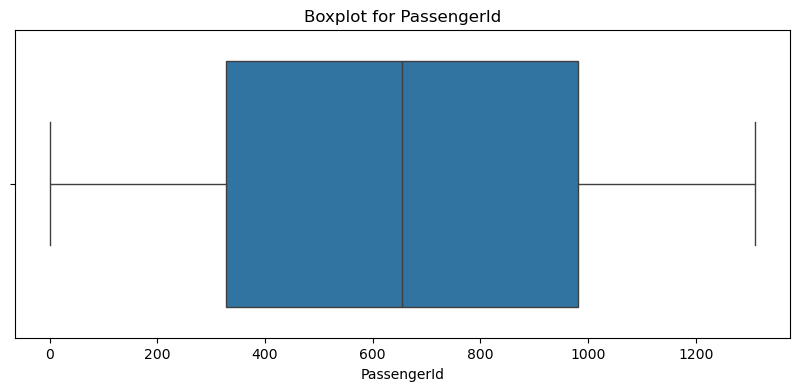

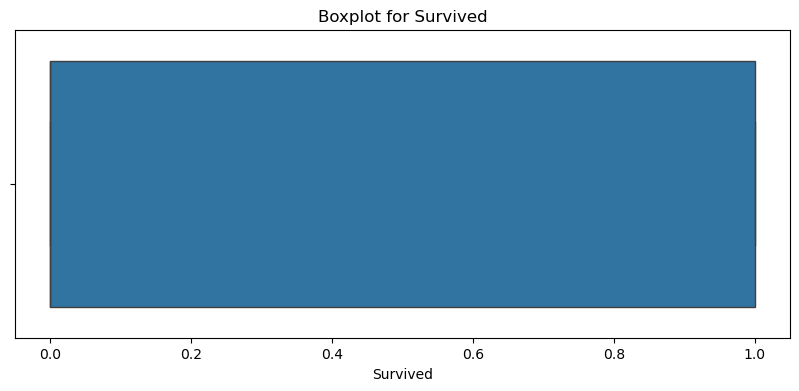

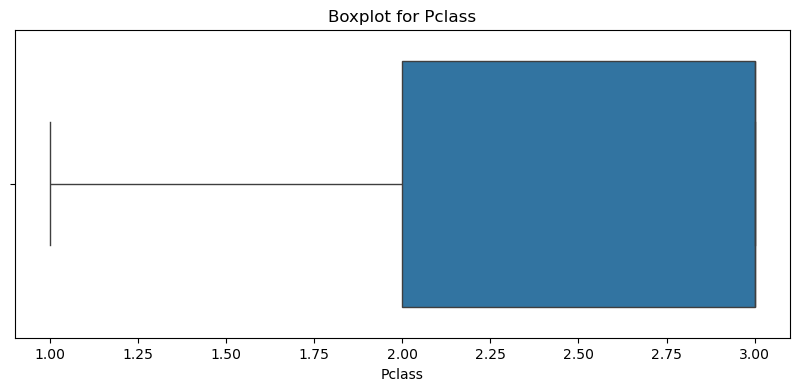

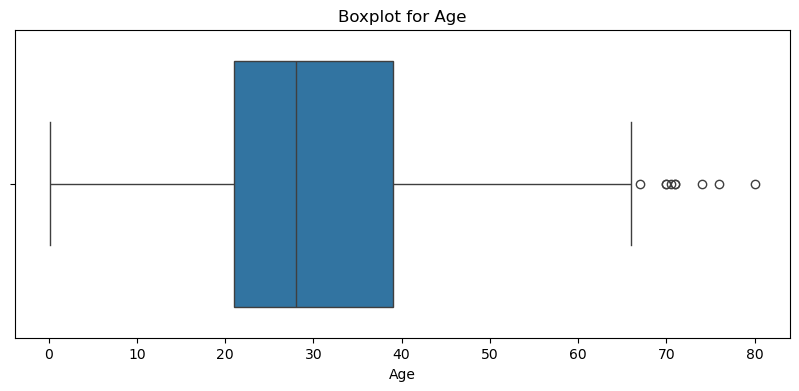

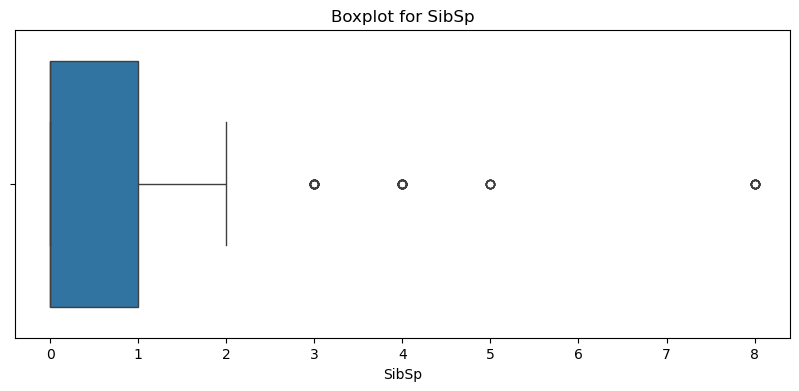

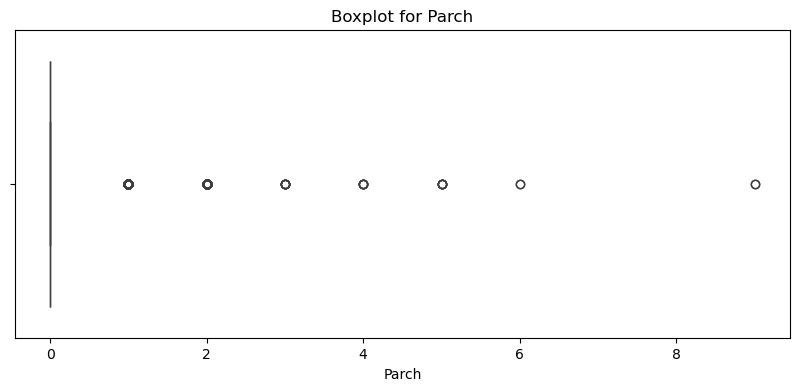

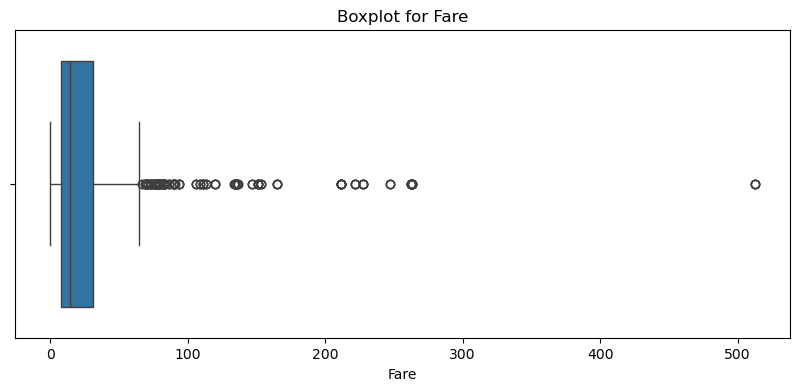

In [9]:
# Alternatively, using seaborn for better visualization creating boxplot for each column seperately
for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()


In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

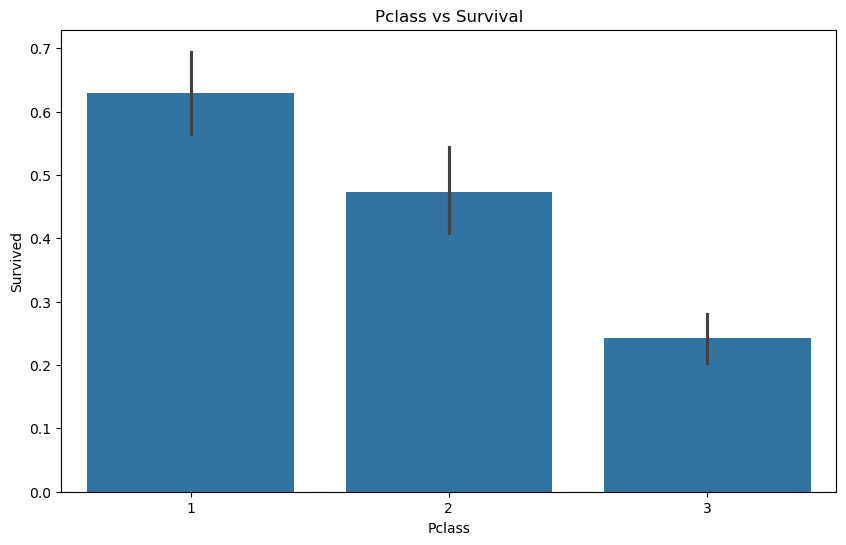

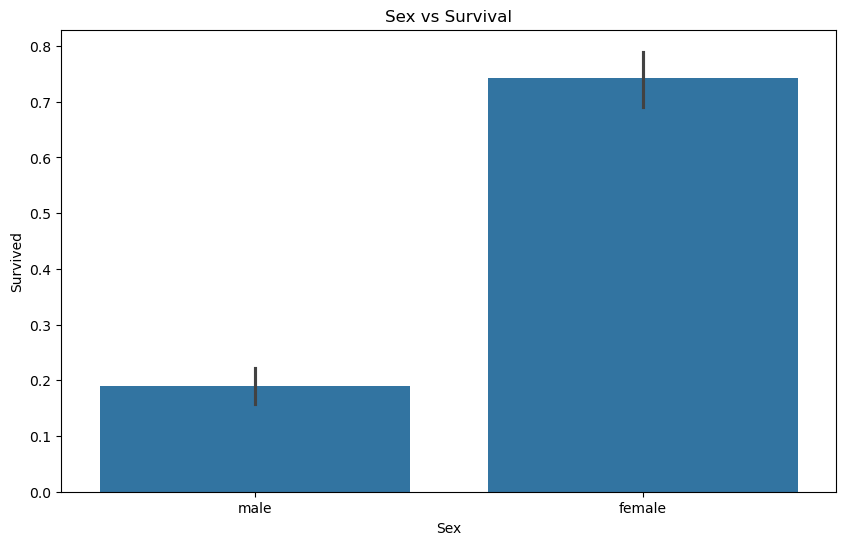

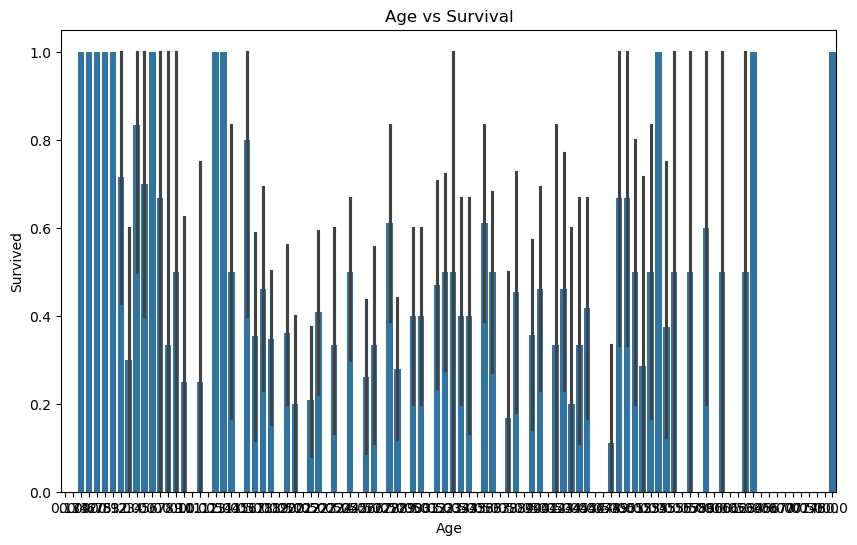

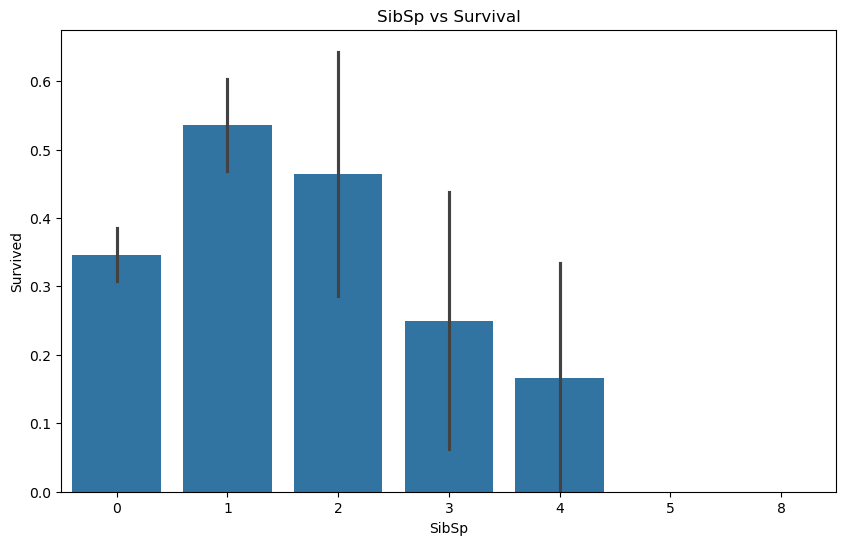

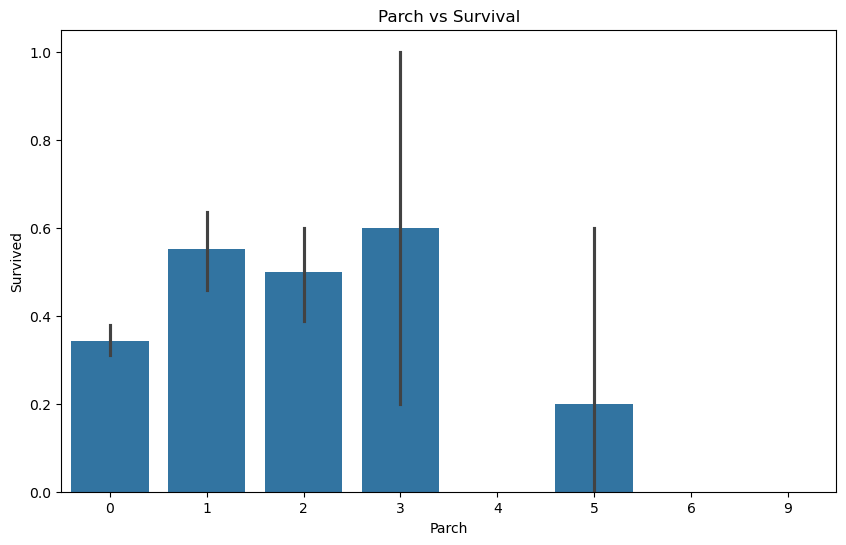

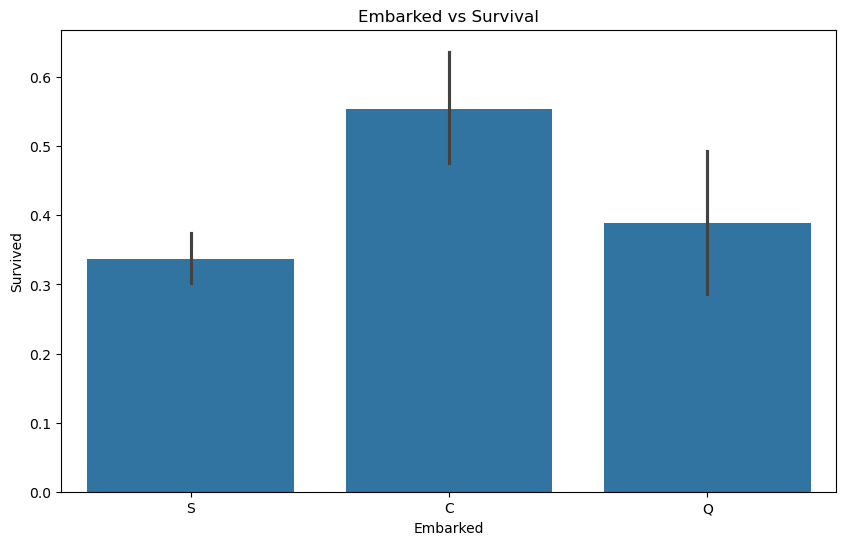

In [11]:
x1=['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Embarked']
# Visualize relationships between features and survival using bar plots
for column in x1:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=df[column], y='Survived', data=train_df)
    plt.title(f'{column} vs Survival')
    plt.show()

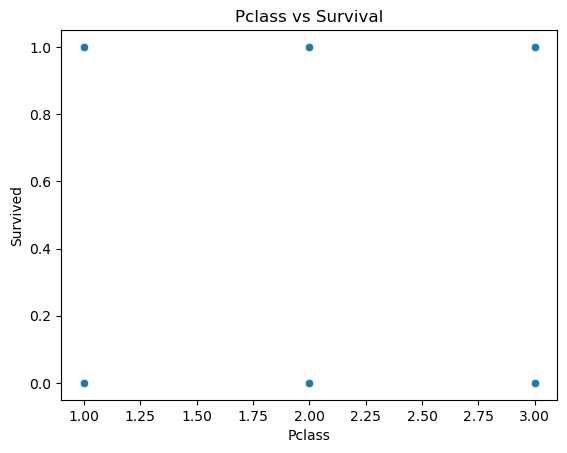

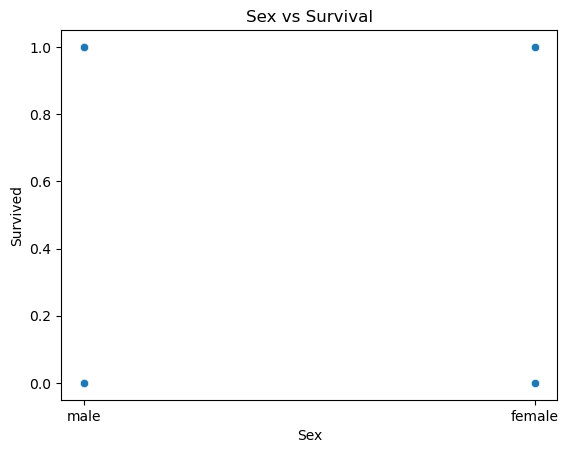

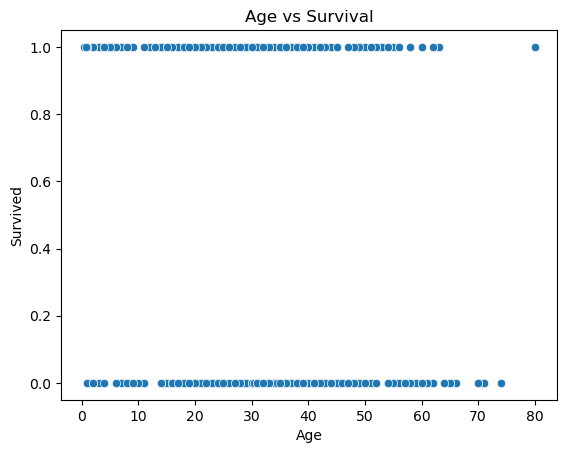

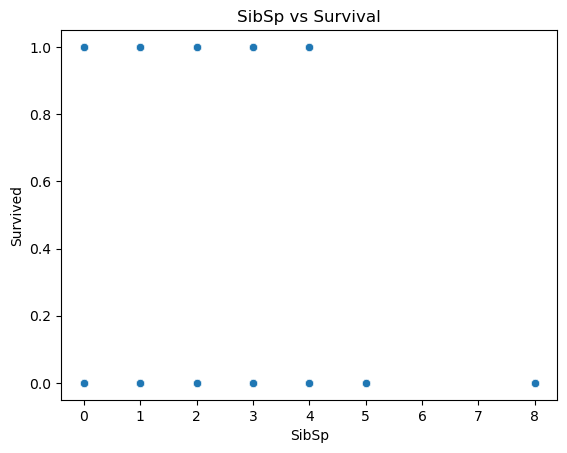

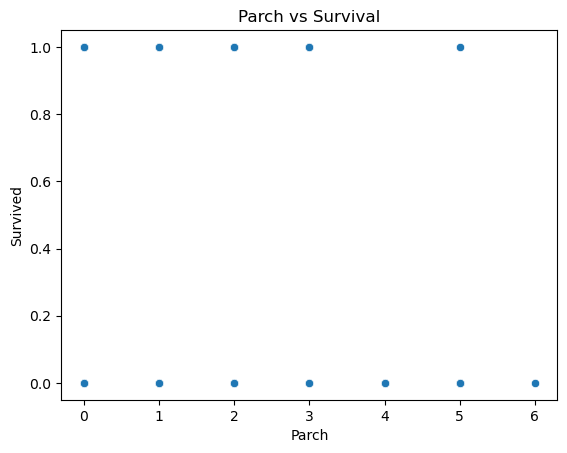

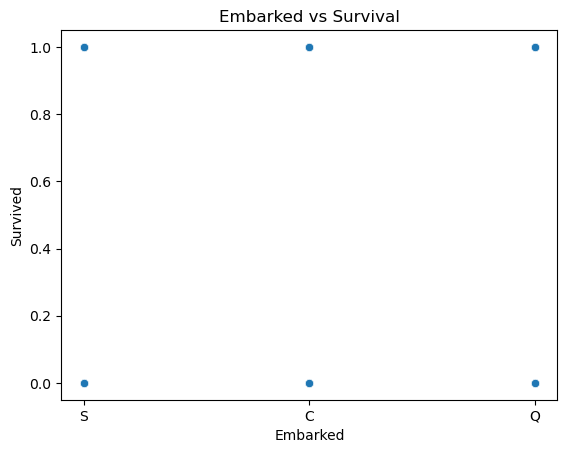

In [12]:
# Visualize relationships between features and survival using scatter plots

for column in x1:
    sns.scatterplot(x=df[column], y='Survived', data=train_df)
    plt.title(f'{column} vs Survival')
    plt.show()

# Data Preprocessing

In [14]:
# Fill missing values in 'Age' with the median
imputer = SimpleImputer(strategy='median')
df['Age'] = imputer.fit_transform(df[['Age']])

# Fill missing values in 'Embarked' with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Fill missing values in 'Survived' with the mean
df['Survived'].fillna(df['Survived'].mean(), inplace=True)
# Drop the 'Cabin' column due to high missing values

df.drop(columns=['Cabin'], inplace=True)

# Fill missing values in 'Fare' with the median
df['Fare'].fillna(df['Fare'].median(), inplace=True)

C:\Users\lbt99\AppData\Local\Temp\ipykernel_12928\3516875795.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
C:\Users\lbt99\AppData\Local\Temp\ipykernel_12928\3516875795.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [15]:
# Encode 'Sex' using Label Encoding
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [16]:
# Drop 'Name', 'Ticket', and 'PassengerId' as they are not useful for modeling
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

In [17]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64

# Building Predictive Models

In [19]:
# Define features (X) and target variable (y)
X = df.drop(['Survived'], axis=1)
# Ensure target labels are integers
y = df['Survived'].astype(int) 

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
# Initialize LightGBM classifier
lgb_model = lgb.LGBMClassifier(random_state=42)

# Train the model
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lgb = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 269, number of negative: 778
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 304
[LightGBM] [Info] Number of data points in the train set: 1047, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.256925 -> initscore=-1.062015
[LightGBM] [Info] Start training from score -1.062015


In [21]:
# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

In [22]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

In [23]:
evaluate_model(y_test, y_pred_lgb, "LightGBM")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

In [24]:
# Define parameter grid for LightGBM
param_grid_lgb = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}

# Perform GridSearchCV for LightGBM
grid_search_lgb = GridSearchCV(lgb_model, param_grid_lgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lgb.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for LightGBM:", grid_search_lgb.best_params_)
print("Best Cross-Validation Accuracy for LightGBM:", grid_search_lgb.best_score_)

[LightGBM] [Info] Number of positive: 269, number of negative: 778
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 304
[LightGBM] [Info] Number of data points in the train set: 1047, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.256925 -> initscore=-1.062015
[LightGBM] [Info] Start training from score -1.062015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [25]:
# Define parameter grid for XGBoost
param_grid_xgb = {
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}

# Perform GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best Cross-Validation Accuracy for XGBoost:", grid_search_xgb.best_score_)

Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
Best Cross-Validation Accuracy for XGBoost: 0.7860788334472544


# Comparative Analysis

In [27]:
# Evaluate tuned models
y_pred_lgb_tuned = grid_search_lgb.best_estimator_.predict(X_test)
y_pred_xgb_tuned = grid_search_xgb.best_estimator_.predict(X_test)

evaluate_model(y_test, y_pred_lgb_tuned, "Tuned LightGBM")
evaluate_model(y_test, y_pred_xgb_tuned, "Tuned XGBoost")

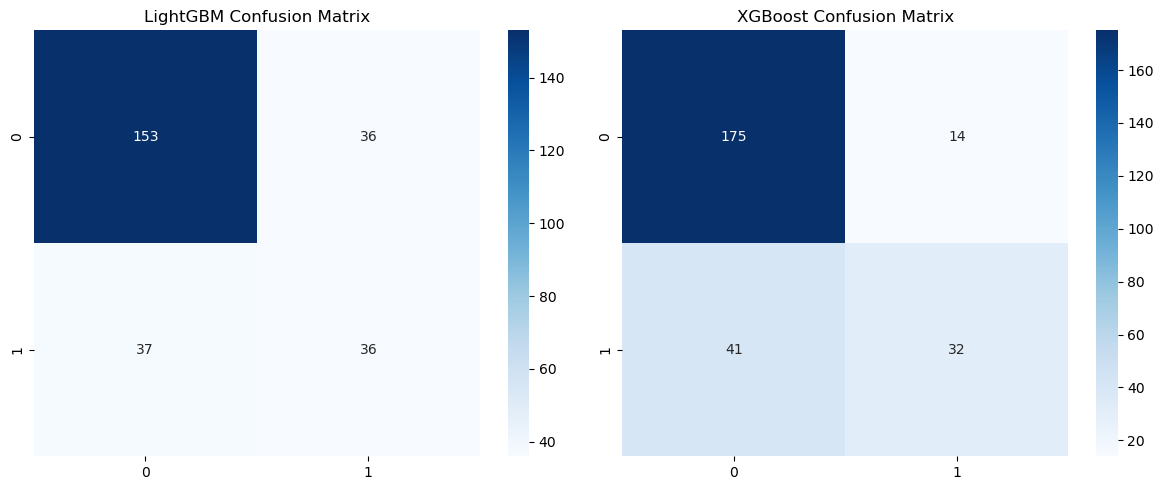

In [28]:
# Confusion matrix for both models
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# LightGBM confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lgb_tuned), annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title("LightGBM Confusion Matrix")

# XGBoost confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_xgb_tuned), annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title("XGBoost Confusion Matrix")

plt.tight_layout()
plt.show()

# Model Performance Comparison:
Untuned Models: Both LightGBM and XGBoost performed similarly, with LightGBM slightly outperforming XGBoost across all metrics.
Tuned Models: After hyperparameter tuning, both models showed improvements in performance. LightGBM maintained a slight edge over XGBoost in terms of accuracy, precision, recall, and F1-score.

# Strengths and Weaknesses:

LightGBM strengths:

 Faster training times due to histogram-based splitting.
 Better handling of large datasets with categorical features.

LightGBM weaknesses:

Slightly less interpretable compared to XGBoost.
May overfit on smaller datasets if not properly regularized.
    
XGBoost strengths:
    
Highly interpretable with built-in feature importance visualization tools.
Robust to overfitting with strong regularization parameters.

XGBoost weaknesses:

Slower training times due to exact greedy algorithm for tree construction.
Requires more computational resources for larger datasets

# Practical Implications:
                                     
Model Choice for Deployment:
            
If computational efficiency is critical (e.g., real-time predictions), LightGBM is the preferred choice due to its faster training and inference times.
If interpretability and robustness are priorities, XGBoost is a better option, especially when explaining model decisions to stakeholders.

Hyperparameter Tuning Importance:
            
Both algorithms benefited significantly from hyperparameter tuning, highlighting the importance of optimizing key parameters like num_leaves, learning_rate, and max_depth.

Feature Engineering:

The analysis underscores the importance of feature engineering and preprocessing. For example, encoding categorical variables and handling missing data appropriately had a substantial impact on model performance.

Survival Predictions:

The models identified Sex, Pclass, and Fare as the most influential predictors of survival. This aligns with historical insights about the Titanic disaster, where women, children, and wealthier passengers were prioritized during evacuation.

# Conclusion:
            
Both LightGBM and XGBoost demonstrated strong predictive capabilities on the Titanic dataset. While LightGBM achieved marginally better performance after tuning, the choice between the two should be guided by practical considerations such as computational resources, interpretability needs, and deployment constraints. Hyperparameter tuning and careful preprocessing were crucial in achieving optimal results, reinforcing their importance in any machine learning workflow.






